# Monthly Playlist Analysis

> Todo
> - `sp.playlist` only returns first 100 tracks. Not sure there's a way to offset the spotipy

## 0.0 Imports & Setup

### 0.1 Imports

In [ ]:
import os
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import numpy as np
import pandas as pd
import datetime
import time
from matplotlib import pyplot as plt
import spotipy

from src.playlists_handler import MonthlyPlaylistHandler

### 0.2 Setup

In [60]:
mpl = MonthlyPlaylistHandler()
sp = mpl.sp_client

## 1.0 Data Querying & Cleaning

In [49]:
mpl = MonthlyPlaylistHandler()

df_mpls = mpl.read_monthly_playlists()

df_mpls

,date,name,description,n_tracks,href,images,snapshot_id
id,,,,,,,
1dAKocsMZ2g4AqkY9nV906,2025-06-01,June 2025,it seems perhaps they will,0,https://api.spotify.com/v1/playlists/1dAKocsMZ...,NaN,AAAABO9a2o0gvmgiFkcsjCSvfEerYJp5
66MNjc3azuCiTlhQe6zHqq,2025-05-01,May 2025,complete unabridged boys night,50,https://api.spotify.com/v1/playlists/66MNjc3az...,"[{'height': None, 'url': 'https://image-cdn-ak...",AAAAOq0HobHDBHF80VoXgOVLKhBCExWe
1YHt2tcyv5xR5m2KX0rA9t,2025-04-01,April 2025,b.abka,23,https://api.spotify.com/v1/playlists/1YHt2tcyv...,"[{'height': None, 'url': 'https://image-cdn-ak...",AAAAH8DWI2H7jRk8InDsNHjLS9YNsySv
393eD1ePHqyMRaEREcBow8,2025-03-01,March 2025,unintentional,57,https://api.spotify.com/v1/playlists/393eD1ePH...,"[{'height': None, 'url': 'https://image-cdn-ak...",AAAAPL7d377RlSsMMCzLFNmT4wuTJ86z
1Vc3qFg0aLYW74jKls7KJr,2025-02-01,February 2025,needlessly impressive,81,https://api.spotify.com/v1/playlists/1Vc3qFg0a...,"[{'height': None, 'url': 'https://image-cdn-ak...",AAAAWDjRI+qO1uUHINQWiH1kLCnzhxNm
...,...,...,...,...,...,...,...
2FPpIykbTksWiEpQOoo0IX,2018-05-01,may 2018,pv = n r t,30,https://api.spotify.com/v1/playlists/2FPpIykbT...,"[{'height': None, 'url': 'https://image-cdn-ak...",AAAAIyn+OulAx6smCpUkxFymtLsbo/dr
5TKjuQprN0KrP6JODUDgv0,2018-04-01,april 2018,shacking up,37,https://api.spotify.com/v1/playlists/5TKjuQprN...,"[{'height': None, 'url': 'https://image-cdn-ak...",AAAANFySg4bUYJ+jHFH83WH+SBa6GSDn
2KrIMSlTHz7UTUT8y1CjCP,2018-03-01,march 2018,beats from the east,38,https://api.spotify.com/v1/playlists/2KrIMSlTH...,"[{'height': None, 'url': 'https://image-cdn-ak...",AAAAMYCwh3qoyRCIBN79A0Zy/0ry3EVB


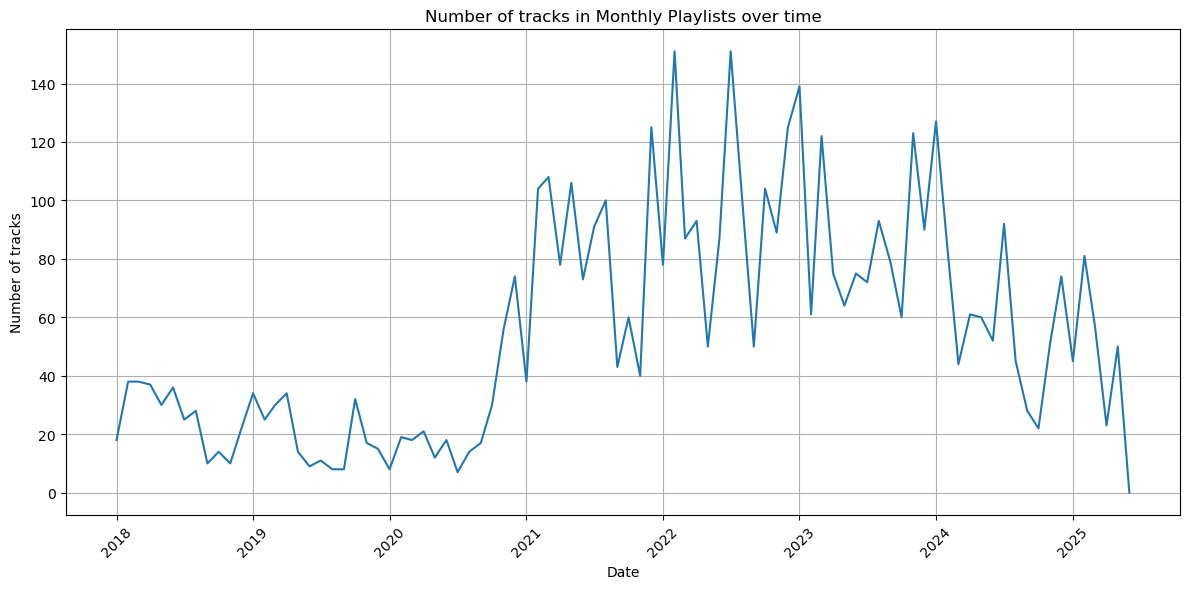

In [59]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pd.to_datetime(df_mpls['date']).dt.date, df_mpls['n_tracks'])
ax.set_title('Number of tracks in Monthly Playlists over time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of tracks')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()  

In [ ]:
track_names = []
track_artists = []
track_date_added = []
playlist_names = []
track_index = []  # 1-indexed position in the playlist
track_artists_index = []  # 1-indexed order of artist on the track
track_album = []
track_release_date = []
track_release_date_precision = []
track_duration = []
track_popularities = []  # note this will change over time, as it depends on number of listens and how recent those listens are
track_external_ids = []  # probably not useful, but could be
track_spid = []
track_artist_genres = []
track_artist_popularity = []

# get track info for all monthly playlists
for id in df_pl_mth['id']:
    # get playlist
    pl_mth = sp.playlist(id)
    time.sleep(20)  # shhh little spotify api client. do not complain. it will all be ok. just rest.

    # iterate through tracks
    for track_i, track in enumerate(pl_mth['tracks']['items']):

        # iterate through each track's artists (can have multiple)
        for artist_i, artist in enumerate(track['track']['artists']):
            # append all data to lists:
            # playlist info
            playlist_names.append(pl_mth['name'])
            track_index.append(track_i + 1)

            # track name, album, artists
            track_date_added.append(track['added_at'])
            track_names.append(track['track']['name'])
            track_artists.append(artist['name'])
            track_artists_index.append(artist_i + 1)  # 1-indexed, not 0
            track_album.append(track['track']['album']['name'])
            

            artist_expanded = sp.artist(artist['id'])
            time.sleep(5)  # little nap

            track_artist_genres.append(artist_expanded['genres'])
            track_artist_popularity.append(artist_expanded['popularity'])

            # track info
            track_release_date.append(track['track']['album']['release_date'])
            track_release_date_precision.append(track['track']['album']['release_date_precision'])
            track_popularities.append(track['track']['popularity'])
            track_duration.append(track['track']['duration_ms'])
            track_external_ids.append(track['track']['external_ids'])
            track_spid.append(track['track']['id'])

KeyboardInterrupt: 

In [ ]:
if track['track']['artists']['id'] not in artist_data:
    next_artist_call.append(track['track']['artists']['id'])

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0WwSkZ7LtFUFjGjMZBMt6T'},
  'href': 'https://api.spotify.com/v1/artists/0WwSkZ7LtFUFjGjMZBMt6T',
  'id': '0WwSkZ7LtFUFjGjMZBMt6T',
  'name': 'Dire Straits',
  'type': 'artist',
  'uri': 'spotify:artist:0WwSkZ7LtFUFjGjMZBMt6T'}]

In [19]:
a = 15
len(df_pl_mth) * a/60

22.5

In [ ]:
track_names = []
track_artists = []
track_date_added = []
playlist_names = []
track_index = []  # 1-indexed position in the playlist
track_artists_index = []  # 1-indexed order of artist on the track
track_album = []
track_release_date = []
track_release_date_precision = []
track_duration = []
track_popularities = []  # note this will change over time, as it depends on number of listens and how recent those listens are
track_external_ids = []  # probably not useful, but could be
track_spid = []
track_artist_genres = []
track_artist_popularity = []

# object to store artist id. will be checked to prevent duplicate API calls
artist_data = {}


# get track info for all monthly playlists
for id in df_pl_mth['id']:
    # get playlist
    pl_mth = sp.playlist(id)
    time.sleep(30)  # shhh little spotify api client. do not complain. it will all be ok. just rest.

    for track_i, track in enumerate(pl_mth['tracks']['items']):

        artist_ids = [x['id'] for x in track['track']['artists']]
        track_artists = sp.artists(artist_ids)
        time.sleep(10)

        # iterate through each track's artists (can have multiple)
        for artist_i, artist in enumerate(track['track']['artists']):

            # append all data we can get from the playlist call to lists:
            if True:
                # playlist info
                playlist_names.append(pl_mth['name'])
                track_index.append(track_i + 1)

                # track name, album, artists
                track_date_added.append(track['added_at'])
                track_names.append(track['track']['name'])
                track_artists.append(artist['name'])
                track_artists_index.append(artist_i + 1)
                track_album.append(track['track']['album']['name'])

                # track info
                track_release_date.append(track['track']['album']['release_date'])
                track_release_date_precision.append(track['track']['album']['release_date_precision'])
                track_popularities.append(track['track']['popularity'])
                track_duration.append(track['track']['duration_ms'])
                track_external_ids.append(track['track']['external_ids'])
                track_spid.append(track['track']['id'])

            # add an empty entry to the artist db
            if artist['id'] not in artist_data:
                artist_data[artist['id']:{}]


artist_ids_batch = []
for id in artist_data:
    
    while len(artist_ids_batch) < 50:
        artist_ids_batch.append(id)
    
    artists = sp.artists(artist_ids_batch)
    for artist in artists:
        artist_data[id]
        track_artist_genres.append(artist_expanded['genres'])
        track_artist_popularity.append(artist_expanded['popularity'])
    artist_ids_batch = []
        


In [ ]:

# get track info for all monthly playlists
for id in df_pl_mth['id']:  # 90
    # get playlist
    pl_mth = sp.playlist(id)
    time.sleep(30)  # shhh little spotify api client. do not complain. it will all be ok. just rest.

    for track_i, track in enumerate(pl_mth['tracks']['items']):  # up to like 150 max. usually below 100

        track_artists = sp.artists(artist_ids)
        time.sleep(10)
        ...

for id in artist_data:  # total number of artists in dataset. lots, though will be less than total number of tracks
    
    while len(artist_ids_batch) < 50:
        artist_ids_batch.append(id)
    
    artists = sp.artists(artist_ids_batch)  # make n_artists/50 calls
    ...
        


In [44]:
api_res

,Unnamed: 0,playlist_name,track_index,added_date,track_name,track_artist,track_artist_index,track_album,track_release_date,track_release_date_precision,track_popularity,track_duration_ms,track_external_ids,track_spotify_id,isrc_country
0,0,March 2025,1,2025-03-01 13:47:18+00:00,Down To The Waterline,Dire Straits,1,Dire Straits,1978-10-07,day,68,241906,{'isrc': 'GBF087800019'},7fYKKFD0jiSlMDgG9IUs1q,GB
1,1,March 2025,2,2025-03-01 14:40:17+00:00,Lions,Dire Straits,1,Dire Straits,1978-10-07,day,52,303893,{'isrc': 'GBF089601044'},4PgZTLaGAMlKD6FCATr2sz,GB
2,2,March 2025,3,2025-03-02 13:02:22+00:00,Water Of Love,Dire Straits,1,Dire Straits,1978-10-07,day,63,325133,{'isrc': 'GBF087900639'},62JvDbmEtwIU3m4LhiG6Ah,GB
3,3,March 2025,4,2025-03-02 13:09:25+00:00,Six Blade Knife,Dire Straits,1,Dire Straits,1978-10-07,day,70,252000,{'isrc': 'GBF089601039'},2miIOgni3EEut8pvYcxeYn,GB
4,4,March 2025,5,2025-03-02 13:17:20+00:00,Sultans Of Swing,Dire Straits,1,Dire Straits,1978-10-07,day,84,348400,{'isrc': 'GBF089601041'},37Tmv4NnfQeb0ZgUC4fOJj,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,6223,january 2018,16,2018-01-17 18:15:42+00:00,Two Words,Mos Def,2,The College Dropout (Explicit),2004-01-01,day,0,266213,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,US
6224,6224,january 2018,16,2018-01-17 18:15:42+00:00,Two Words,Freeway,3,The College Dropout (Explicit),2004-01-01,day,0,266213,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,US
6225,6225,january 2018,16,2018-01-17 18:15:42+00:00,Two Words,The Boys Choir Of Harlem,4,The College Dropout (Explicit),2004-01-01,day,0,266213,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,US
6226,6226,january 2018,17,2018-01-31 17:23:09+00:00,"Lie, Cheat, Steal",Run The Jewels,1,Run the Jewels 2,2014-10-24,day,0,208466,{'isrc': 'QM8RL1400018'},3UN6UkL6M0l8vfZS7OffZ6,QM


In [45]:
api_res.groupby('playlist_name').agg({'track_index':'max'})

,track_index
playlist_name,
01 23,100
01-24,100
02 23,61
02-24,83
03 23,100
...,...
sep 22,50
september 2018,10
september 2019,8


In [ ]:
n_playlist_qs = len(df_pl_mth)
n_artist_qs = 

In [42]:
api_res = pd.read_csv('data/api_res_2025-03-28.csv')
print(len(api_res))
print(len(api_res['track_artist'].unique())/50)

6228
37.56


In [33]:
api_res

,Unnamed: 0,playlist_name,track_index,added_date,track_name,track_artist,track_artist_index,track_album,track_release_date,track_release_date_precision,track_popularity,track_duration_ms,track_external_ids,track_spotify_id,isrc_country
0,0,March 2025,1,2025-03-01 13:47:18+00:00,Down To The Waterline,Dire Straits,1,Dire Straits,1978-10-07,day,68,241906,{'isrc': 'GBF087800019'},7fYKKFD0jiSlMDgG9IUs1q,GB
1,1,March 2025,2,2025-03-01 14:40:17+00:00,Lions,Dire Straits,1,Dire Straits,1978-10-07,day,52,303893,{'isrc': 'GBF089601044'},4PgZTLaGAMlKD6FCATr2sz,GB
2,2,March 2025,3,2025-03-02 13:02:22+00:00,Water Of Love,Dire Straits,1,Dire Straits,1978-10-07,day,63,325133,{'isrc': 'GBF087900639'},62JvDbmEtwIU3m4LhiG6Ah,GB
3,3,March 2025,4,2025-03-02 13:09:25+00:00,Six Blade Knife,Dire Straits,1,Dire Straits,1978-10-07,day,70,252000,{'isrc': 'GBF089601039'},2miIOgni3EEut8pvYcxeYn,GB
4,4,March 2025,5,2025-03-02 13:17:20+00:00,Sultans Of Swing,Dire Straits,1,Dire Straits,1978-10-07,day,84,348400,{'isrc': 'GBF089601041'},37Tmv4NnfQeb0ZgUC4fOJj,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,6223,january 2018,16,2018-01-17 18:15:42+00:00,Two Words,Mos Def,2,The College Dropout (Explicit),2004-01-01,day,0,266213,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,US
6224,6224,january 2018,16,2018-01-17 18:15:42+00:00,Two Words,Freeway,3,The College Dropout (Explicit),2004-01-01,day,0,266213,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,US
6225,6225,january 2018,16,2018-01-17 18:15:42+00:00,Two Words,The Boys Choir Of Harlem,4,The College Dropout (Explicit),2004-01-01,day,0,266213,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,US
6226,6226,january 2018,17,2018-01-31 17:23:09+00:00,"Lie, Cheat, Steal",Run The Jewels,1,Run the Jewels 2,2014-10-24,day,0,208466,{'isrc': 'QM8RL1400018'},3UN6UkL6M0l8vfZS7OffZ6,QM


In [34]:
api_res = pd.read_csv('data/api_res_2025-03-31.csv')
print(len(api_res))
print(np.ceil(len(api_res['artist'].unique())/50))

3193
25.0


In [228]:
df_tracks = pd.DataFrame({
    # playlist info
    'playlist_name': playlist_names, 
    'playlist_index': track_index, 
    'added_date': track_date_added, 

    # names
    'track_name': track_names, 
    'artist': track_artists, 
    'artist_genres':track_artist_genres, 
    'artist_index': track_artists_index, 
    'album': track_album, 

    # info
    'release_date': track_release_date, 
    'release_date_precision': track_release_date_precision, 
    'track_popularity': track_popularities, 
    'artist_popularity': track_artist_popularity, 
    'duration_ms': track_duration, 

    # ids
    'track_external_ids': track_external_ids, 
    'track_spotify_id': track_spid 
})

# tidy data:

# convert to datetime
def standardise_date(date:str):
    # year only
    if len(date) == 4:
        if date == '0000':
            # special case where the track has been removed, and has a null date
            return None
        return date+'-01-01'
    # year + month
    elif len(date) == 7:
        return date+'-01'
    # year + month + date - no need to change
    else:
        return date

df_tracks['added_date'] = pd.to_datetime(df_tracks['added_date'])
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'].apply(standardise_date))
df_tracks['playlist_date'] = pd.to_datetime('01-' + df_tracks['added_date'].dt.month.astype(str) + '-' + df_tracks['added_date'].dt.year.astype(str), dayfirst = True).dt.date

# get country code from isrc
def get_isrc_country(dict):
    if 'isrc' in dict.keys():
        return dict['isrc'][:2]
    else:
        return None
df_tracks['isrc_country'] = df_tracks['track_external_ids'].apply(get_isrc_country)

# save to csv and display
df_tracks.to_csv(f'data/api_res_{str(datetime.datetime.now().date())}.csv')
df_tracks

,playlist_name,playlist_index,added_date,track_name,artist,artist_genres,artist_index,album,release_date,release_date_precision,track_popularity,artist_popularity,duration_ms,track_external_ids,track_spotify_id,playlist_date,isrc_country
0,March 2025,1,2025-03-01 13:47:18+00:00,Down To The Waterline,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,68,79,241906,{'isrc': 'GBF087800019'},7fYKKFD0jiSlMDgG9IUs1q,2025-03-01,GB
1,March 2025,2,2025-03-01 14:40:17+00:00,Lions,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,52,79,303893,{'isrc': 'GBF089601044'},4PgZTLaGAMlKD6FCATr2sz,2025-03-01,GB
2,March 2025,3,2025-03-02 13:02:22+00:00,Water Of Love,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,63,79,325133,{'isrc': 'GBF087900639'},62JvDbmEtwIU3m4LhiG6Ah,2025-03-01,GB
3,March 2025,4,2025-03-02 13:09:25+00:00,Six Blade Knife,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,70,79,252000,{'isrc': 'GBF089601039'},2miIOgni3EEut8pvYcxeYn,2025-03-01,GB
4,March 2025,5,2025-03-02 13:17:20+00:00,Sultans Of Swing,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,84,79,348400,{'isrc': 'GBF089601041'},37Tmv4NnfQeb0ZgUC4fOJj,2025-03-01,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,jul 22,96,2022-07-17 13:09:06+00:00,The Beat - 2021 Remaster,Elvis Costello & The Attractions,"[new wave, power pop]",1,This Year's Model (2021 Remaster),1978-03-17,day,40,51,228973,{'isrc': 'GBASQ7800025'},1bqlDsBlBPxjK0zuFQcSXq,2022-07-01,GB
3189,jul 22,97,2022-07-17 13:11:17+00:00,Time Was,Canned Heat,"[blues rock, blues, classic blues]",1,Hallelujah,1969-07-08,day,49,56,202253,{'isrc': 'USEM38700073'},1lLQtlPli8kTLJsTrcnRuQ,2022-07-01,US
3190,jul 22,98,2022-07-17 13:15:17+00:00,Eastern Jam,Country Joe & The Fish,"[psychedelic rock, acid rock]",1,I-Feel-Like-I'm-Fixin'-To-Die,1967-01-01,year,26,35,270600,{'isrc': 'USVG28807024'},4mg6TO4GnHzT99YodF0b0W,2022-07-01,US
3191,jul 22,99,2022-07-17 13:19:29+00:00,Gold And Silver,Quicksilver Messenger Service,"[acid rock, psychedelic rock]",1,Quicksilver Messenger Service,1968-01-01,year,33,38,403533,{'isrc': 'USCA28800516'},6qwwAbxSYq9MTEIn0UMFNA,2022-07-01,US


In [16]:
df_tracks = pd.read_csv(f'data/api_res_{str(datetime.datetime.now().date())}.csv')

In [198]:
df_tracks[df_tracks['artist_genres'].apply(lambda x: 'funk rock' in x)].drop_duplicates('artist')

,playlist_name,playlist_index,added_date,track_name,artist,artist_genres,artist_index,album,release_date,release_date_precision,track_popularity,artist_popularity,duration_ms,track_external_ids,track_spotify_id,playlist_date,isrc_country
12,March 2025,13,2025-03-04 18:45:21+00:00,New Beastly,Vulfpeck,[funk rock],1,Clarity of Cal,2025-03-04,day,55,63,251748,{'isrc': 'QMFMF2433745'},1yQNHzLx4VFofmUNHT3FHa,2025-03-01,QM
117,February 2025,39,2025-02-19 14:42:02+00:00,Ain't That Funkin' Kinda Hard on You? (feat. K...,Funkadelic,"[funk rock, funk]",1,Ain't That Funkin' Kinda Hard on You? (We Ain'...,2016-03-09,day,46,52,309723,{'isrc': 'QM2UR1500001'},6SgQIoLn8kpu8J4wfwGWy8,2025-02-01,QM
161,February 2025,72,2025-02-26 14:09:09+00:00,The Force,Lettuce,"[jazz funk, funk rock]",1,Crush,2015-11-06,day,45,46,221933,{'isrc': 'TCACJ1512868'},1da6XFL8cThblY2yvJLEBM,2025-02-01,TC
170,February 2025,80,2025-02-27 19:38:33+00:00,Blue Angels,The Fearless Flyers,"[jazz funk, jazz fusion, funk rock]",1,The Fearless Flyers IV,2024-02-09,day,45,46,270052,{'isrc': 'QZFZ62401446'},3dHdu2fban1DHShcgPed3l,2025-02-01,QZ
221,January 2025,43,2025-01-23 20:00:01+00:00,Otherside,Red Hot Chili Peppers,"[funk rock, alternative rock, rock]",1,Californication (Deluxe Edition),1999-06-08,day,82,84,255373,{'isrc': 'USWB19900693'},64BbK9SFKH2jk86U3dGj2P,2025-01-01,US
1533,09 23,11,2023-09-07 08:46:39+00:00,Love Like Anthrax,Gang Of Four,"[post-punk, new wave, proto-punk, funk rock, p...",1,Entertainment!,1979-09-25,day,29,49,264200,{'isrc': 'GB01A7900022'},0luLrvQxGwkTjCbtGiEaO0,2023-09-01,GB
1978,05 23,20,2023-05-08 12:15:05+00:00,Gemini,Snarky Puppy,"[jazz fusion, jazz funk, jazz, funk rock, nu j...",1,Culcha Vulcha,2016-04-29,day,0,48,315253,{'isrc': 'QZ2EW1600053'},1SQWFRArmVgZYmfJDXLmCT,2023-05-01,QZ


In [199]:
def find_genre(genre = None, df = df_tracks, return_ind = False):
    if isinstance(genre, type(None)):
        ind = df['artist_genres'].apply(lambda x: len(x)) == 0
    else:
        ind = df['artist_genres'].apply(lambda x: genre in x)
    
    if return_ind:
        return ind
    else: 
        return df[ind]

In [ ]:
find_genre() 

,playlist_name,playlist_index,added_date,track_name,artist,artist_genres,artist_index,album,release_date,release_date_precision,track_popularity,artist_popularity,duration_ms,track_external_ids,track_spotify_id,playlist_date,isrc_country
16,March 2025,17,2025-03-09 09:45:20+00:00,Insecure,Tom Misch,[],1,Insecure,2024-05-02,day,29,67,195106,{'isrc': 'QM6MZ2432736'},3tLVfEh8kJhMkDaxvOzK1M,2025-03-01,QM
17,March 2025,18,2025-03-09 09:51:52+00:00,Invincible,Tom Misch,[],1,Six Songs,2024-12-20,day,56,67,207706,{'isrc': 'QMFME2464413'},6vXHUbR7Mkr5ZvSZS7JE26,2025-03-01,QM
18,March 2025,19,2025-03-09 13:28:45+00:00,it's not litter if you bin it,Niko B,[],1,dog eat dog food world,2024-05-24,day,46,52,186005,{'isrc': 'GB45A2400057'},6CO5jaNwuiZJ0rlwMBeVSm,2025-03-01,GB
23,March 2025,21,2025-03-09 16:35:07+00:00,"Running Away (feat. Joey Dosik, David T. Walke...",James Gadson,[],4,Mr Finish Line,2017-11-07,day,41,25,272251,{'isrc': 'TCADG1740518'},6tOgeTNf9Zvts2JXwXFeQZ,2025-03-01,TC
24,March 2025,22,2025-03-10 19:26:08+00:00,Spookie Coochie,Doechii,[],1,Spookie Coochie,2019-10-20,day,68,89,168620,{'isrc': 'QZHN91959325'},3QKKtAgmUkgt4uKpX5Hmlf,2025-03-01,QZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,jul 22,90,2022-07-17 11:25:08+00:00,One II,Benny Sings,[],1,Art (2022 Remastered Deluxe),2022-07-08,day,9,62,221052,{'isrc': 'NLH211100677'},2YkkGuitJZmEZ2Rj2NbGDX,2022-07-01,NL
3183,jul 22,92,2022-07-17 12:57:48+00:00,Beige,Arin Ray,[],2,Beige,2019-12-20,day,54,51,197173,{'isrc': 'USUYG1285748'},3dvRD7tnKF9Kxocks07jue,2022-07-01,US
3184,jul 22,92,2022-07-17 12:57:48+00:00,Beige,Elena Pinderhughes,[],3,Beige,2019-12-20,day,54,41,197173,{'isrc': 'USUYG1285748'},3dvRD7tnKF9Kxocks07jue,2022-07-01,US
3185,jul 22,93,2022-07-17 13:00:18+00:00,Looks,Steve Lacy,[],1,Steve Lacy's Demo,2017-02-24,day,0,81,91465,{'isrc': 'GBKPL1778013'},4Z9npQ93MrnIkRcTBKwSa3,2022-07-01,GB


In [227]:
df_tracks

,playlist_name,playlist_index,added_date,track_name,artist,artist_genres,artist_index,album,release_date,release_date_precision,track_popularity,artist_popularity,duration_ms,track_external_ids,track_spotify_id,playlist_date,isrc_country
0,March 2025,1,2025-03-01 13:47:18+00:00,Down To The Waterline,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,68,79,241906,{'isrc': 'GBF087800019'},7fYKKFD0jiSlMDgG9IUs1q,2025-03-01,GB
1,March 2025,2,2025-03-01 14:40:17+00:00,Lions,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,52,79,303893,{'isrc': 'GBF089601044'},4PgZTLaGAMlKD6FCATr2sz,2025-03-01,GB
2,March 2025,3,2025-03-02 13:02:22+00:00,Water Of Love,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,63,79,325133,{'isrc': 'GBF087900639'},62JvDbmEtwIU3m4LhiG6Ah,2025-03-01,GB
3,March 2025,4,2025-03-02 13:09:25+00:00,Six Blade Knife,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,70,79,252000,{'isrc': 'GBF089601039'},2miIOgni3EEut8pvYcxeYn,2025-03-01,GB
4,March 2025,5,2025-03-02 13:17:20+00:00,Sultans Of Swing,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,84,79,348400,{'isrc': 'GBF089601041'},37Tmv4NnfQeb0ZgUC4fOJj,2025-03-01,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,jul 22,96,2022-07-17 13:09:06+00:00,The Beat - 2021 Remaster,Elvis Costello & The Attractions,"[new wave, power pop]",1,This Year's Model (2021 Remaster),1978-03-17,day,40,51,228973,{'isrc': 'GBASQ7800025'},1bqlDsBlBPxjK0zuFQcSXq,2022-07-01,GB
3189,jul 22,97,2022-07-17 13:11:17+00:00,Time Was,Canned Heat,"[blues rock, blues, classic blues]",1,Hallelujah,1969-07-08,day,49,56,202253,{'isrc': 'USEM38700073'},1lLQtlPli8kTLJsTrcnRuQ,2022-07-01,US
3190,jul 22,98,2022-07-17 13:15:17+00:00,Eastern Jam,Country Joe & The Fish,"[psychedelic rock, acid rock]",1,I-Feel-Like-I'm-Fixin'-To-Die,1967-01-01,year,26,35,270600,{'isrc': 'USVG28807024'},4mg6TO4GnHzT99YodF0b0W,2022-07-01,US
3191,jul 22,99,2022-07-17 13:19:29+00:00,Gold And Silver,Quicksilver Messenger Service,"[acid rock, psychedelic rock]",1,Quicksilver Messenger Service,1968-01-01,year,33,38,403533,{'isrc': 'USCA28800516'},6qwwAbxSYq9MTEIn0UMFNA,2022-07-01,US


In [230]:
gb = df_tracks.groupby('playlist_date').agg({'artist_genres':sum}).reset_index()
gb['artist_genres'] = gb['artist_genres'].apply(lambda x: list(set(x)))

gb['n_genres'] = gb['artist_genres'].apply(lambda x : len(x))
gb

/var/folders/n4/jz0_qc0d73z45fzcx27k4ghh0000gn/T/ipykernel_12533/3166340099.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gb = df_tracks.groupby('playlist_date').agg({'artist_genres':sum}).reset_index()


,playlist_date,artist_genres,n_genres
0,2022-07-01,"[experimental, retro soul, motown, jazz fusion...",68
1,2022-08-01,"[jazz, retro soul, motown, jazz fusion, southe...",42
2,2022-09-01,"[post-punk, classic blues, baroque pop, power ...",37
3,2022-10-01,"[jazz, northern soul, big band, liquid funk, m...",51
4,2022-11-01,"[jazz, big band, liquid funk, motown, jazz fus...",50
5,2022-12-01,"[jazz, big band, northern soul, retro soul, mo...",51
6,2023-01-01,"[jazz, northern soul, downtempo, retro soul, j...",55
7,2023-02-01,"[jazz, experimental, retro soul, chanson, jazz...",55
8,2023-03-01,"[jazz, melodic rap, motown, jazz fusion, post-...",45
9,2023-04-01,"[experimental, jazz, northern soul, post-punk,...",59


In [235]:
df_tracks

,playlist_name,playlist_index,added_date,track_name,artist,artist_genres,artist_index,album,release_date,release_date_precision,track_popularity,artist_popularity,duration_ms,track_external_ids,track_spotify_id,playlist_date,isrc_country
0,March 2025,1,2025-03-01 13:47:18+00:00,Down To The Waterline,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,68,79,241906,{'isrc': 'GBF087800019'},7fYKKFD0jiSlMDgG9IUs1q,2025-03-01,GB
1,March 2025,2,2025-03-01 14:40:17+00:00,Lions,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,52,79,303893,{'isrc': 'GBF089601044'},4PgZTLaGAMlKD6FCATr2sz,2025-03-01,GB
2,March 2025,3,2025-03-02 13:02:22+00:00,Water Of Love,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,63,79,325133,{'isrc': 'GBF087900639'},62JvDbmEtwIU3m4LhiG6Ah,2025-03-01,GB
3,March 2025,4,2025-03-02 13:09:25+00:00,Six Blade Knife,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,70,79,252000,{'isrc': 'GBF089601039'},2miIOgni3EEut8pvYcxeYn,2025-03-01,GB
4,March 2025,5,2025-03-02 13:17:20+00:00,Sultans Of Swing,Dire Straits,[classic rock],1,Dire Straits,1978-10-07,day,84,79,348400,{'isrc': 'GBF089601041'},37Tmv4NnfQeb0ZgUC4fOJj,2025-03-01,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,jul 22,96,2022-07-17 13:09:06+00:00,The Beat - 2021 Remaster,Elvis Costello & The Attractions,"[new wave, power pop]",1,This Year's Model (2021 Remaster),1978-03-17,day,40,51,228973,{'isrc': 'GBASQ7800025'},1bqlDsBlBPxjK0zuFQcSXq,2022-07-01,GB
3189,jul 22,97,2022-07-17 13:11:17+00:00,Time Was,Canned Heat,"[blues rock, blues, classic blues]",1,Hallelujah,1969-07-08,day,49,56,202253,{'isrc': 'USEM38700073'},1lLQtlPli8kTLJsTrcnRuQ,2022-07-01,US
3190,jul 22,98,2022-07-17 13:15:17+00:00,Eastern Jam,Country Joe & The Fish,"[psychedelic rock, acid rock]",1,I-Feel-Like-I'm-Fixin'-To-Die,1967-01-01,year,26,35,270600,{'isrc': 'USVG28807024'},4mg6TO4GnHzT99YodF0b0W,2022-07-01,US
3191,jul 22,99,2022-07-17 13:19:29+00:00,Gold And Silver,Quicksilver Messenger Service,"[acid rock, psychedelic rock]",1,Quicksilver Messenger Service,1968-01-01,year,33,38,403533,{'isrc': 'USCA28800516'},6qwwAbxSYq9MTEIn0UMFNA,2022-07-01,US


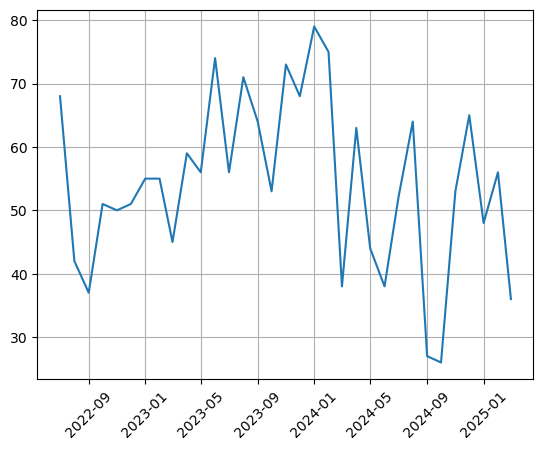

In [234]:
plt.plot(gb['playlist_date'], gb['n_genres'])
plt.grid()
plt.xticks(rotation = 45)
plt.show()

<Axes: >

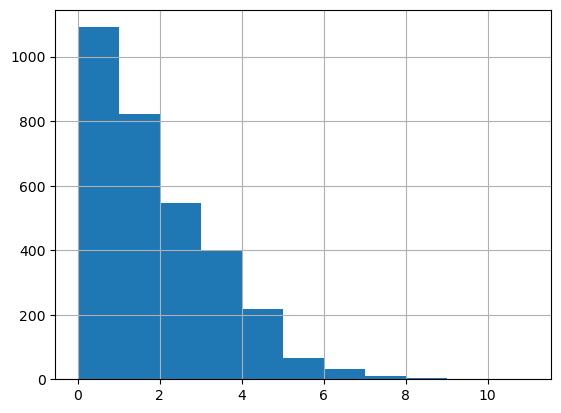

In [213]:
df_tracks['artist_genres'].apply(lambda x: len(x)).hist(bins = 11)

In [153]:
df_tracks.groupby(by='track_artist').agg({'playlist_name':'count'}).sort_values('playlist_name',ascending=False)  

,playlist_name
track_artist,
The Beatles,102
Vulfpeck,86
Kanye West,73
Masayoshi Takanaka,54
BADBADNOTGOOD,53
...,...
Light Club,1
Life on Planets,1
Liam Bailey,1


In [163]:
df_tracks[df_tracks['track_name'] == 'Love Is a Beautiful Thing']

,playlist_name,track_index,added_date,track_name,track_artist,track_artist_index,track_album,track_release_date,track_release_date_precision,track_popularity,track_duration_ms,track_external_ids,track_spotify_id,playlist_date,isrc_country
434,09-24,19,2024-09-25 10:40:04+00:00,Love Is a Beautiful Thing,Vulfpeck,1,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2024-09-01,TC
435,09-24,19,2024-09-25 10:40:04+00:00,Love Is a Beautiful Thing,Theo Katzman,2,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2024-09-01,TC
436,09-24,19,2024-09-25 10:40:04+00:00,Love Is a Beautiful Thing,Monica Martin,3,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2024-09-01,TC
1966,05 23,26,2023-05-10 08:32:40+00:00,Love Is a Beautiful Thing,Vulfpeck,1,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2023-05-01,TC
1967,05 23,26,2023-05-10 08:32:40+00:00,Love Is a Beautiful Thing,Theo Katzman,2,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2023-05-01,TC
1968,05 23,26,2023-05-10 08:32:40+00:00,Love Is a Beautiful Thing,Monica Martin,3,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2023-05-01,TC
3854,december 2021,16,2021-12-02 16:09:55+00:00,Love Is a Beautiful Thing,Vulfpeck,1,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2021-12-01,TC
3855,december 2021,16,2021-12-02 16:09:55+00:00,Love Is a Beautiful Thing,Theo Katzman,2,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2021-12-01,TC
3856,december 2021,16,2021-12-02 16:09:55+00:00,Love Is a Beautiful Thing,Monica Martin,3,Hill Climber,2018-12-07,day,41,233314,{'isrc': 'TCADW1815720'},59qmUODXmHXiWwvG8WdzEW,2021-12-01,TC
3896,december 2021,46,2021-12-07 21:48:54+00:00,Love Is a Beautiful Thing,Theo Katzman,1,Heartbreak Hits,2017-01-06,day,37,210251,{'isrc': 'TCACU1609265'},6NzE6TTlRMXonm5YEMVlVc,2021-12-01,TC


In [171]:
gb = df_tracks.groupby(by=['track_name','track_album']).agg({'playlist_name':'count','track_artist_index':'max'})
gb['res'] = (gb['playlist_name']/gb['track_artist_index']).astype(int)

gb.sort_values('res',ascending=False)[['res']].reset_index().groupby('track_name').agg({'res':'sum'}).sort_values('res', ascending=False)

,res
track_name,
Three Man Weave,8
Boogie Man,7
Heatwave,7
Animal Spirits,6
Tee Time,6
...,...
How to Love (Intro),1
Huit octobre 1971,1
Hunnybee,1


In [118]:
df_tracks.groupby(by = ['playlist_name','track_name']).agg({'track_artist_index':'count'}).reset_index().sort_values(by=['playlist_name','track_artist_index'], ascending=False)

,playlist_name,track_name,track_artist_index
4587,september 2021,Drive Slow,3
4588,september 2021,Everything I Am,2
4591,september 2021,I Ain't Done Wrong,2
4594,september 2021,I'm Not Talking,2
4598,september 2021,Maze of Sounds,2
...,...,...,...
92,01 23,Where Can I Go?,1
94,01 23,Who Knows,1
95,01 23,Wouldn't It Be Nice - Mono,1
96,01 23,You're so Fine,1


In [174]:
df_tracks['track_album'].drop_duplicates().to_frame()

,track_album
0,Dire Straits
6,Communiqué
10,Moon - EP
12,Clarity of Cal
13,Fugue State
...,...
6168,Doris
6192,Hell Can Wait
6193,Prima Donna
6197,Below the Heavens


In [175]:
df_tracks['track_artist'].drop_duplicates().to_frame()

,track_artist
0,Dire Straits
10,M|O|O|N
12,Vulfpeck
16,Tom Misch
18,Niko B
...,...
6161,Austin Feinstein
6188,Chester P
6191,Rude Kid
6198,Exile
